In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/readme.txt
/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/7/7/Arousal_Valence.csv
/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/7/7/Panas.csv
/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/7/7/raw_gsr.csv
/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/7/7/raw_ppg.csv
/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/7/7/Emotions.csv
/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/7/7/camera.csv
/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/47/47/Arousal_Valence.csv
/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/47/47/Panas.csv
/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/47/47/raw_gsr.csv
/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/47/47/raw_ppg.csv
/kaggle/input/raw

# 2nd column is valence, 3rd column is arousal 

# 31 rows x 4 columns

In [2]:
sample_arousal_valence = pd.read_csv("/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/10/10/Arousal_Valence.csv")
print(sample_arousal_valence)

    16  6  3  4
0   17  3  5  6
1   18  5  5  7
2   19  6  7  6
3   20  6  5  6
4   21  7  4  5
5   22  5  2  3
6   23  5  3  5
7    8  5  5  7
8    9  7  2  5
9   10  6  4  5
10  11  7  4  5
11  12  6  5  7
12  13  8  3  6
13  14  5  3  6
14  15  7  2  6
15  24  5  5  6
16  25  6  7  8
17  26  3  5  7
18  27  6  6  7
19  28  5  6  7
20  29  5  6  5
21  30  6  5  6
22  31  6  7  5
23   0  4  7  7
24   1  6  6  6
25   2  5  6  8
26   3  3  5  9
27   4  5  6  6
28   5  3  5  9
29   6  5  5  6
30   7  5  7  7


In [3]:
sample_arousal_valence.shape

(31, 4)

In [4]:
# import pandas as pd

# sample_raw_gsr = pd.read_csv('/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/10/10/raw_gsr.csv', delimiter=',', encoding='latin1')
# # print(sample_raw_ppg)

with open('/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/10/10/raw_gsr.csv', 'r') as file:
    for _ in range(5):
        print(file.readline())
        
# sample_raw_gsr = pd.read_csv('/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/10/10/raw_gsr.csv')

1653098503514,167626.65625

,167471.5

,167102.015625

,166955.375

1653098504514,166100.59375



In [5]:
with open('/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/10/10/raw_gsr.csv', 'r') as file:
    for i, line in enumerate(file):
        if 40 <= i <= 50:  # Print lines near the problematic line
            print(f"Line {i}: {line}")


Line 40: 1653098513514,160582.453125

Line 41: ,161048.28125

Line 42: ,161530.78125

Line 43: ,161736.203125

Line 44: 1653098514514,162662.21875,60

Line 45: ,162934.453125

Line 46: ,163200.359375

Line 47: ,162932.984375

Line 48: 1653098515514,161923.4375

Line 49: ,160348.984375

Line 50: ,158409.1875



In [6]:
with open('/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/10/10/raw_gsr.csv', 'r') as file:
    for _ in range(55):
        print(file.readline())

1653098503514,167626.65625

,167471.5

,167102.015625

,166955.375

1653098504514,166100.59375

,166128.859375

,165834.359375

,164697.875

1653098505514,162906.546875

,160625.859375

,157993.640625

,155868.5625

1653098506514,154536.578125

,153685.015625

,153312.03125

,153390.703125

1653098507514,153859.90625

,154674.765625

,155562.28125

,156477.078125

1653098508514,157111.984375

,157485.46875

,157590.515625

,157376.78125

1653098509514,156990.3125

,156641.3125

,156430.09375

,156397.296875

1653098510514,156580.859375

,158044.28125

,157763.8125

,157835.984375

1653098511514,158431.25

,159343.4375

,159119.765625

,160388.265625

1653098512514,160691.28125

,160694.125

,160889.1875

,160626.421875

1653098513514,160582.453125

,161048.28125

,161530.78125

,161736.203125

1653098514514,162662.21875,60

,162934.453125

,163200.359375

,162932.984375

1653098515514,161923.4375

,160348.984375

,158409.1875

,156600.25

1653098516514,155188.796875

,154266.671875

,1

In [7]:
# for gsr

sample_raw_gsr = pd.read_csv(
    '/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/10/10/raw_gsr.csv', 
    names=['timestamp', 'gsr_value', 'extra_column'],  # Define expected columns
    na_values=[''],  # Treat empty strings as NaN
    skiprows=1  # Skip header if needed
)

In [8]:
print(sample_raw_gsr)

          timestamp      gsr_value  extra_column
0               NaN  167471.500000           NaN
1               NaN  167102.015625           NaN
2               NaN  166955.375000           NaN
3      1.653099e+12  166100.593750           NaN
4               NaN  166128.859375           NaN
...             ...            ...           ...
14682           NaN  158623.375000           NaN
14683  1.653102e+12  158737.984375           NaN
14684           NaN  159241.437500           NaN
14685           NaN  159396.109375           NaN
14686           NaN  159654.781250           NaN

[14687 rows x 3 columns]


In [9]:
print(sample_raw_gsr['gsr_value'])

gsr_10 = sample_raw_gsr['gsr_value']


0        167471.500000
1        167102.015625
2        166955.375000
3        166100.593750
4        166128.859375
             ...      
14682    158623.375000
14683    158737.984375
14684    159241.437500
14685    159396.109375
14686    159654.781250
Name: gsr_value, Length: 14687, dtype: float64


In [10]:
print(gsr_10)

0        167471.500000
1        167102.015625
2        166955.375000
3        166100.593750
4        166128.859375
             ...      
14682    158623.375000
14683    158737.984375
14684    159241.437500
14685    159396.109375
14686    159654.781250
Name: gsr_value, Length: 14687, dtype: float64


In [11]:
gsr_10.shape

(14687,)

In [12]:
# for ppg

sample_raw_ppg = pd.read_csv(
   '/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/10/10/raw_ppg.csv', 
    names=['timestamp', 'ppg_value', 'extra_column'],  # Define expected columns
    na_values=[''],  # Treat empty strings as NaN
    skiprows=1  # Skip header if needed
)

print(sample_raw_ppg['ppg_value'])
ppg_10 = sample_raw_ppg['ppg_value']

0         956083.0
1         957633.0
2         959069.0
3         960354.0
4         961414.0
            ...   
348594    520632.0
348595    520862.0
348596    521081.0
348597    521116.0
348598    521097.0
Name: ppg_value, Length: 348599, dtype: float64


In [13]:
ppg_10.shape

(348599,)

# Organize data as shown below :

X_train :

| subject_id | sequence_id | ppg_series | gsr_series |
|------------|-------------|------------|------------|
| 1          | 1           | [...]      | [...]      |
| 1          | 2           | [...]      | [...]      |
| 1          | 3           | [...]      | [...]      |
| 2          | 1           | [...]      | [...]      |
| 2          | 2           | [...]      | [...]      |
| 2          | 3           | [...]      | [...]      |


y_train :

| subject_id | sequence_id | arousal | valence |
|------------|-------------|---------|---------|
| 1          | 1           | 7       | 6       |
| 1          | 2           | 9       | 8       |
| 1          | 3           | 4       | 5       |
| 2          | 1           | 6       | 2       |
| 2          | 2           | 8       | 4       |
| 2          | 3           | 5       | 6       |

# Updated features_target dataframe

| subject_id | series_id | ppg_series | gsr_series | Target |
|------------|-----------|------------|------------|--------|
| 1          | 1         | [...]      | [...]      | AxVy   |
| 1          | 2         | [...]      | [...]      | AxVy   |
| 1          | 3         | [...]      | [...]      | AxVy   |
| 2          | 1         | [...]      | [...]      | AxVy   |
| 2          | 2         | [...]      | [...]      | AxVy   |
| 2          | 3         | [...]      | [...]      | AxVy   |



In [14]:
import os
import pandas as pd
import numpy as np

# Initialize an empty list to store data for each row
data = []

# Define the base directory
base_dir = '/kaggle/input/raw-ppg-gsr-data-for-emotion-recognition/raw_data_ppg_gsr/'

# Loop through each subject's subdirectory
for subject_folder in os.listdir(base_dir):
    subject_dir = os.path.join(base_dir, subject_folder, subject_folder)
    
    if os.path.isdir(subject_dir):  # Check if it’s a directory
        subject_id = int(subject_folder)  # Extract subject_id from folder name
        
        # Load raw_gsr.csv and raw_ppg.csv with specific column names
        raw_gsr_path = os.path.join(subject_dir, 'raw_gsr.csv')
        raw_ppg_path = os.path.join(subject_dir, 'raw_ppg.csv')
        
        # Define column names and load the data, treating empty strings as NaN and skipping the header row
        raw_gsr = pd.read_csv(
            raw_gsr_path, 
            names=['timestamp', 'gsr_value', 'extra_column'], 
            na_values=[''], 
            skiprows=1
        )['gsr_value']  # Select only the 'gsr_value' column

        raw_ppg = pd.read_csv(
            raw_ppg_path, 
            names=['timestamp', 'ppg_value', 'extra_column'], 
            na_values=[''], 
            skiprows=1
        )['ppg_value']  # Select only the 'ppg_value' column
        
        # Calculate downsampling factor
        gsr_downsample_factor = len(raw_gsr) // 6000
        ppg_downsample_factor = len(raw_ppg) // 6000
        
        # Downsample by taking every nth data point
        downsampled_gsr = raw_gsr.iloc[::gsr_downsample_factor].head(6000)
        downsampled_ppg = raw_ppg.iloc[::ppg_downsample_factor].head(6000)
        
        # Split the downsampled data into chunks of 200 for each row in the DataFrame
        gsr_chunks = np.array_split(downsampled_gsr.values.flatten(), 30)
        ppg_chunks = np.array_split(downsampled_ppg.values.flatten(), 30)
        
        # Load Arousal_Valence.csv for target labels
        av_path = os.path.join(subject_dir, 'Arousal_Valence.csv')
        av_data = pd.read_csv(av_path)

        for series_id in range(1, 31):  # For each of the 30 sequences per subject
            # Extract the chunk of 200 values for gsr_series and ppg_series
            gsr_series = gsr_chunks[series_id - 1]
            ppg_series = ppg_chunks[series_id - 1]
            
            # Create target label in "AxVy" format
            valence = int(av_data.iloc[series_id - 1, 1])  # Second column is Valence
            arousal = int(av_data.iloc[series_id - 1, 2])  # Third column is Arousal
            target = f"A{arousal}V{valence}"
            
            # Append the data to the list
            data.append({
                'subject_id': subject_id,
                'series_id': series_id,
                'ppg_series': ppg_series,
                'gsr_series': gsr_series,
                'target': target
            })

# Convert the list of dictionaries to a DataFrame
features_target = pd.DataFrame(data)

# Display the first few rows of the DataFrame
features_target.head()

,subject_id,series_id,ppg_series,gsr_series,target
0,7,1,"[799777.0, 800031.0, 770530.0, 783136.0, 77184...","[192276.21875, 192022.203125, 191918.46875, 21...",A4V6
1,7,2,"[782666.0, 781125.0, 786560.0, 793689.0, 79145...","[177154.21875, 177107.75, 177348.90625, 177485...",A2V7
2,7,3,"[783222.0, 774507.0, 775848.0, 780017.0, 77640...","[174372.71875, 174527.484375, 174541.609375, 1...",A3V3
3,7,4,"[631551.0, 644157.0, 663125.0, 658480.0, 65069...","[159124.453125, 159066.09375, 159165.1875, 159...",A3V6
4,7,5,"[580910.0, 581498.0, 583054.0, 580285.0, 57964...","[153937.34375, 154182.421875, 154383.625, 1544...",A4V8


In [15]:
features_target.shape

(2190, 5)

# List all unique subject_id values

In [16]:
unique_subject_ids = features_target['subject_id'].unique()
print(unique_subject_ids)


[ 7 47 19 22  2 35 50 23 10  5 61 36 20 45 60 64 41 39 32 25 42 52 75  8
 38 12 55 49 62 53 70 34 18 79 65 67 78 28 66 56 72 26 74 15 69 77 43 71
  1 58 59 30 14 76 57  9 46 21 44 40 80  6 11 68 63 37 51 33 54 48 29 24
 73]


# Count of unique subject_id values

In [17]:
unique_subject_count = features_target['subject_id'].nunique()
print(unique_subject_count)


73


# After preprocessing check that each subject id has the same number of sequence ids (value counts)

In [18]:
import os
import torch
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MaxNLocator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from multiprocessing import cpu_count

from sklearn.metrics import classification_report , confusion_matrix

# Preprocessing to convert string values of surfaces to integers for neural network

In [19]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(features_target.target)

In [20]:
encoded_labels

array([29, 12, 17, ..., 21, 36,  2])

In [21]:

#labels are stored in the classes_ property in label encoder
label_encoder.classes_
# to reverse transformation if and when needed

array(['A1V3', 'A1V4', 'A1V5', 'A1V6', 'A1V7', 'A1V8', 'A1V9', 'A2V2',
       'A2V3', 'A2V4', 'A2V5', 'A2V6', 'A2V7', 'A2V8', 'A2V9', 'A3V1',
       'A3V2', 'A3V3', 'A3V4', 'A3V5', 'A3V6', 'A3V7', 'A3V8', 'A3V9',
       'A4V1', 'A4V2', 'A4V3', 'A4V4', 'A4V5', 'A4V6', 'A4V7', 'A4V8',
       'A5V1', 'A5V2', 'A5V3', 'A5V4', 'A5V5', 'A5V6', 'A5V7', 'A5V8',
       'A5V9', 'A6V1', 'A6V2', 'A6V3', 'A6V4', 'A6V5', 'A6V6', 'A6V7',
       'A6V8', 'A7V1', 'A7V2', 'A7V3', 'A7V4', 'A7V5', 'A7V6', 'A7V7',
       'A7V8', 'A8V1', 'A8V2', 'A8V3', 'A8V4', 'A8V5', 'A8V6', 'A8V7',
       'A8V8', 'A8V9', 'A9V2', 'A9V3', 'A9V6', 'A9V7', 'A9V8', 'A9V9'],
      dtype=object)

In [22]:
features_target['label']=encoded_labels

In [23]:
unique_labels_count = features_target['label'].nunique()
print(unique_labels_count)

72


In [24]:
features_target.head()

,subject_id,series_id,ppg_series,gsr_series,target,label
0,7,1,"[799777.0, 800031.0, 770530.0, 783136.0, 77184...","[192276.21875, 192022.203125, 191918.46875, 21...",A4V6,29
1,7,2,"[782666.0, 781125.0, 786560.0, 793689.0, 79145...","[177154.21875, 177107.75, 177348.90625, 177485...",A2V7,12
2,7,3,"[783222.0, 774507.0, 775848.0, 780017.0, 77640...","[174372.71875, 174527.484375, 174541.609375, 1...",A3V3,17
3,7,4,"[631551.0, 644157.0, 663125.0, 658480.0, 65069...","[159124.453125, 159066.09375, 159165.1875, 159...",A3V6,20
4,7,5,"[580910.0, 581498.0, 583054.0, 580285.0, 57964...","[153937.34375, 154182.421875, 154383.625, 1544...",A4V8,31


In [25]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset

# Step 1: Initialize an empty list to store sequences and labels
sequences = []

# Step 2: Iterate through each row in features_target DataFrame to create sequence_features and add to sequences list
for _, row in features_target.iterrows():
    # Extract the first 200 values from ppg_series and gsr_series, assuming they are stored as arrays
    sequence_features = pd.DataFrame({
        'ppg_series': row['ppg_series'][:200],
        'gsr_series': row['gsr_series'][:200]
    })
    
    # Append (sequence_features, label) as a tuple to the sequences list
    sequences.append((sequence_features, row['label']))

train_sequences, test_sequences = train_test_split(sequences, test_size=0.2)

len(train_sequences) , len(test_sequences)

In [26]:
# Step 3: Split into training and test sets
train_sequences, test_sequences = train_test_split(sequences, test_size=0.2)
len(train_sequences), len(test_sequences)

(1752, 438)

In [27]:
# Dataset class
class MixedEmotionDataset(Dataset): 
    def __init__(self, sequences):
        self.sequences = sequences
        
    def __len__(self):
        return len(self.sequences)
    
    def __getitem__(self, idx):
        sequence, label = self.sequences[idx]
        return dict(
            sequence=torch.Tensor(sequence.to_numpy()),  # Convert DataFrame to tensor
            label=torch.tensor(label).long()
        )

In [28]:
# MixedEmotionDataLoader for train, validation, and test DataLoaders
class MixedEmotionDataLoader:
    
    def __init__(self, train_sequences, test_sequences, batch_size):
        self.train_sequences = train_sequences
        self.test_sequences = test_sequences
        self.batch_size = batch_size
        self.setup()
        
    def setup(self):
        self.train_dataset = MixedEmotionDataset(self.train_sequences)
        self.test_dataset = MixedEmotionDataset(self.test_sequences)
        
    def get_train_loader(self):
        return DataLoader(
            self.train_dataset,
            batch_size=self.batch_size,
            shuffle=True,
            num_workers=cpu_count()
        )
    
    def get_val_loader(self):
        return DataLoader(
            self.test_dataset,
            batch_size=self.batch_size,
            shuffle=False,
            num_workers=cpu_count()
        )
    
    def get_test_loader(self):
        return DataLoader(
            self.test_dataset,
            batch_size=self.batch_size,
            shuffle=False,
            num_workers=cpu_count()
        )


# Model

In [29]:
class SequenceModel(nn.Module):
    # classification, number of hidden units, number of layers for LSTM
    
    def __init__(self, n_features, n_classes , n_hidden=256, n_layers=3):
        super().__init__()
        
        self.lstm = nn.LSTM(
        input_size = n_features,
        hidden_size=n_hidden,
        num_layers=n_layers,
        batch_first=True,
        dropout=0.75)
        
        self.classifier = nn.Linear(n_hidden , n_classes)
        
    def forward(self, x):
        self.lstm.flatten_parameters()
        _, (hidden, _) = self.lstm(x)
        
        out = hidden[-1]
        
        return self.classifier(out)

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchmetrics import Accuracy
import matplotlib.pyplot as plt

class MixedEmotionPredictor(nn.Module): 
    def __init__(self, n_features: int, n_classes: int):
        super(MixedEmotionPredictor, self).__init__()
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = SequenceModel(n_features, n_classes).to(self.device)
        self.criterion = nn.CrossEntropyLoss()
        self.accuracy_metric = Accuracy(task='multiclass', num_classes=n_classes).to(self.device)
        
        # Initialize lists to store metrics for each epoch
        self.epoch_train_losses = []
        self.epoch_val_losses = []
        self.epoch_train_accuracies = []
        self.epoch_val_accuracies = []
        
    def forward(self, x):
        return self.model(x)
    
    def compute_loss_and_accuracy(self, outputs, labels):
        loss = self.criterion(outputs, labels)
        predictions = torch.argmax(outputs, dim=1)
        accuracy = self.accuracy_metric(predictions, labels)
        return loss, accuracy
        
    def plot_metrics(self):
        num_epochs = min(len(self.epoch_train_losses), len(self.epoch_val_losses))
        epochs = range(1, num_epochs + 1)
        
        train_losses = self.epoch_train_losses[:num_epochs]
        val_losses = self.epoch_val_losses[:num_epochs]
        train_accuracies = self.epoch_train_accuracies[:num_epochs]
        val_accuracies = self.epoch_val_accuracies[:num_epochs]
        
        plt.figure(figsize=(12, 5))
        
        # Plot Loss
        plt.subplot(1, 2, 1)
        plt.plot(epochs, train_losses, 'b', label='Training Loss')
        plt.plot(epochs, val_losses, 'r', label='Validation Loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        
        # Plot Accuracy
        plt.subplot(1, 2, 2)
        plt.plot(epochs, train_accuracies, 'b', label='Training Accuracy')
        plt.plot(epochs, val_accuracies, 'r', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
    
    def train_model(self, train_loader, val_loader, num_epochs=10, lr=0.0001):
        optimizer = optim.Adam(self.parameters(), lr=lr)

        for epoch in range(num_epochs):
            # Training phase
            self.train()
            train_losses = []
            train_accuracies = []

            for batch in train_loader:
                sequences = batch["sequence"].to(self.device)
                labels = batch["label"].to(self.device)

                optimizer.zero_grad()
                outputs = self(sequences)
                loss, accuracy = self.compute_loss_and_accuracy(outputs, labels)

                loss.backward()
                optimizer.step()

                train_losses.append(loss.item())
                train_accuracies.append(accuracy.item())

            avg_train_loss = sum(train_losses) / len(train_losses)
            avg_train_accuracy = sum(train_accuracies) / len(train_accuracies)

            # Validation phase
            self.eval()
            val_losses = []
            val_accuracies = []

            with torch.no_grad():
                for batch in val_loader:
                    sequences = batch["sequence"].to(self.device)
                    labels = batch["label"].to(self.device)

                    outputs = self(sequences)
                    loss, accuracy = self.compute_loss_and_accuracy(outputs, labels)

                    val_losses.append(loss.item())
                    val_accuracies.append(accuracy.item())

            avg_val_loss = sum(val_losses) / len(val_losses)
            avg_val_accuracy = sum(val_accuracies) / len(val_accuracies)

            # Store epoch metrics for plotting
            self.epoch_train_losses.append(avg_train_loss)
            self.epoch_val_losses.append(avg_val_loss)
            self.epoch_train_accuracies.append(avg_train_accuracy)
            self.epoch_val_accuracies.append(avg_val_accuracy)

            # Print metrics
            print(f"Epoch {epoch + 1}/{num_epochs}")
            print(f"  Training Loss: {avg_train_loss:.4f}, Training Accuracy: {avg_train_accuracy:.4f}")
            print(f"  Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {avg_val_accuracy:.4f}")

        # Plot training and validation metrics
        self.plot_metrics()


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 1/250, Train Loss: 4.2541, Train Accuracy: 0.0400, Val Loss: 4.2150, Val Accuracy: 0.0479
Validation loss improved from inf to 4.2150. Saving model...
Epoch 2/250, Train Loss: 4.1470, Train Accuracy: 0.0622, Val Loss: 3.9583, Val Accuracy: 0.0479
Validation loss improved from 4.2150 to 3.9583. Saving model...
Epoch 3/250, Train Loss: 3.8505, Train Accuracy: 0.0628, Val Loss: 3.8592, Val Accuracy: 0.0479
Validation loss improved from 3.9583 to 3.8592. Saving model...
Epoch 4/250, Train Loss: 3.7859, Train Accuracy: 0.0588, Val Loss: 3.8396, Val Accuracy: 0.0479
Validation loss improved from 3.8592 to 3.8396. Saving model...
Epoch 5/250, Train Loss: 3.7743, Train Accuracy: 0.0628, Val Loss: 3.8404, Val Accuracy: 0.0479
Epoch 6/250, Train Loss: 3.7697, Train Accuracy: 0.0628, Val Loss: 3.8409, Val Accuracy: 0.0479
Epoch 7/250, Train Loss: 3.7678, Train Accuracy: 0.0628, Val Loss: 3.8430, Val Accuracy: 0.0479
Epoch 8/250, Train Loss: 3.7658, Train Accuracy: 0.0628, Val Loss: 3.8445, 

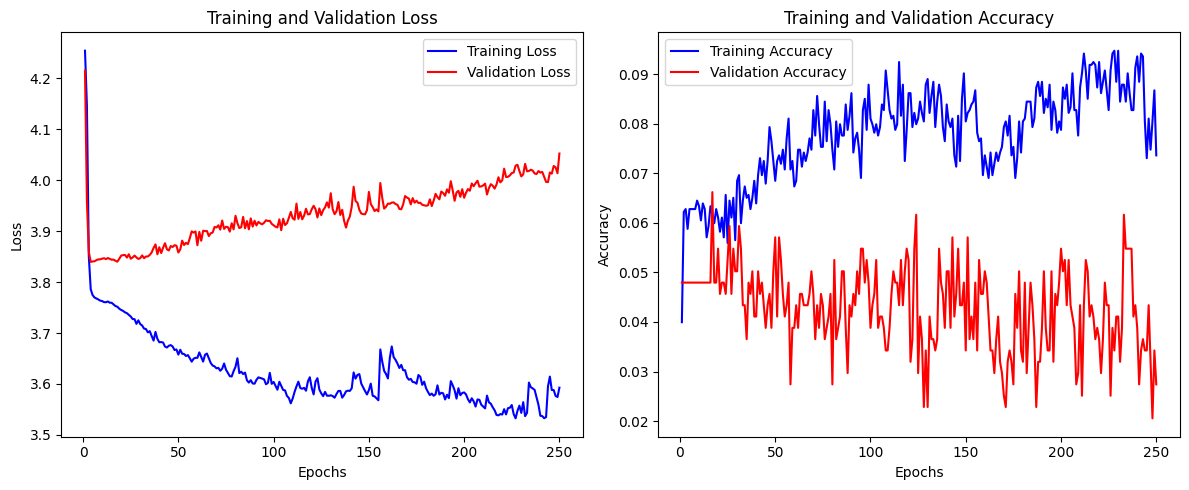

In [31]:

import torch
from torch.utils.tensorboard import SummaryWriter
import os

# Parameters
N_EPOCHS = 250
BATCH_SIZE = 64
CHECKPOINT_DIR = "checkpoints"
LOG_DIR = "lightning_logs/surface"
BEST_MODEL_PATH = os.path.join(CHECKPOINT_DIR, "best-checkpoint.pth")

# Ensure directories exist
os.makedirs(CHECKPOINT_DIR, exist_ok=True)

# Instantiate TensorBoard writer
writer = SummaryWriter(LOG_DIR)

# Function to save the model checkpoint
def save_checkpoint(model, optimizer, epoch, val_loss, best_val_loss):
    # Only save the model if the current val_loss is better than the best_val_loss
    if val_loss < best_val_loss:
        print(f"Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. Saving model...")
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'val_loss': val_loss,
        }, BEST_MODEL_PATH)
        return val_loss
    return best_val_loss

# Training loop
def train(model, train_loader, val_loader, criterion, optimizer):
    best_val_loss = float('inf')

    for epoch in range(1, N_EPOCHS + 1):
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        # Training step
        for batch in train_loader:
            sequences, labels = batch["sequence"].to(model.device), batch["label"].to(model.device)
            optimizer.zero_grad()
            outputs = model(sequences)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * sequences.size(0)
            train_correct += (outputs.argmax(1) == labels).sum().item()
            train_total += labels.size(0)
        
        avg_train_loss = train_loss / train_total
        train_accuracy = train_correct / train_total
        
        # Validation step
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for batch in val_loader:
                sequences, labels = batch["sequence"].to(model.device), batch["label"].to(model.device)
                outputs = model(sequences)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * sequences.size(0)
                val_correct += (outputs.argmax(1) == labels).sum().item()
                val_total += labels.size(0)
                
        avg_val_loss = val_loss / val_total
        val_accuracy = val_correct / val_total

        # Logging to TensorBoard
        writer.add_scalar("Loss/Train", avg_train_loss, epoch)
        writer.add_scalar("Loss/Validation", avg_val_loss, epoch)
        writer.add_scalar("Accuracy/Train", train_accuracy, epoch)
        writer.add_scalar("Accuracy/Validation", val_accuracy, epoch)

        # Print metrics
        print(f"Epoch {epoch}/{N_EPOCHS}, "
              f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")
        
        # Save metrics to model for plotting
        model.epoch_train_losses.append(avg_train_loss)
        model.epoch_train_accuracies.append(train_accuracy)
        model.epoch_val_losses.append(avg_val_loss)
        model.epoch_val_accuracies.append(val_accuracy)
        
        # Save checkpoint
        best_val_loss = save_checkpoint(model, optimizer, epoch, avg_val_loss, best_val_loss)

    writer.close()

# Example usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_features = 2  # using ppg_series and gsr_series features
n_classes = len(label_encoder.classes_)  # Replace with actual number of classes

# Initialize model, optimizer, and criterion
model = MixedEmotionPredictor(n_features=n_features, n_classes=n_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = torch.nn.CrossEntropyLoss()

# Instantiate data loader
data_loader = MixedEmotionDataLoader(train_sequences, test_sequences, BATCH_SIZE)
train_loader = data_loader.get_train_loader()
val_loader = data_loader.get_val_loader()

# Train the model
train(model, train_loader, val_loader, criterion, optimizer)

# Plot metrics
model.plot_metrics()
